___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Clustering (Customer Segmentation) Project***". This is the last medium project of ***Machine Learning*** course. 

At the end of this project, you will have performed ***Cluster Analysis*** with an ***Unsupervised Learning*** method.

---

In this project, customers are required to be segmented according to the purchasing history obtained from the membership cards of a big mall.

This project is less challenging than other projects. After getting to know the data set quickly, you are expected to perform ***Exploratory Data Analysis***. You should observe the distribution of customers according to different variables, also discover relationships and correlations between variables. Then you will spesify the different variables to use for cluster analysis.

Finally, you should clustered customers using the ***K-Means Clustering*** method, after that label the clusters.

- ***NOTE:*** *This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind Cluster Analysis and scikit-learn module as well as Machine Learning before you begin.*

---
---

# #Tasks

Mentoring Prep. and self study#### 

#### 1. Import Libraries, Load Dataset, Exploring Data
- Import Libraries
- Load Dataset
- Explore Data

#### 2. Exploratory Data Analysis (EDA)


#### 3. Cluster Analysis

- Clustering based on Age and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Clustering based on Annual Income and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Hierarchical Clustering

    *i. Determine optimal number of clusters using Dendogram*

    *ii. Apply Agglomerative Clustering*

    *iii. Visualizing and Labeling All the Clusters* 

- Conclusion

---
---

## 1. Import Libraries, Load Dataset, Exploring Data

There is a big mall in a specific city that keeps information of its customers who subscribe to a membership card. In the membetrship card they provide following information : gender, age and annula income. The customers use this membership card to make all the purchases in the mall, so tha mall has the purchase history of all subscribed members and according to that they compute the spending score of all customers. You have to segment these customers based on the details given. 

#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Load Dataset

In [2]:
data = pd.read_csv("Mall_Customers.csv")

In [3]:
data.head(29)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [4]:
df = data.copy()

#### Explore Data

You can rename columns to more usable, if you need.

In [5]:
df.shape

(200, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [8]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [9]:
df.rename(columns={'Annual Income (k$)':"annual_income",'Spending Score (1-100)':'spending_score'},inplace=True)

In [10]:
df.columns = df.columns.str.lower()

In [11]:
df.columns

Index(['customerid', 'gender', 'age', 'annual_income', 'spending_score'], dtype='object')

## 2. Exploratory Data Analysis (EDA)

After performing Cluster Analysis, you need to know the data well in order to label the observations correctly. Analyze frequency distributions of features, relationships and correlations between the independent variables and the dependent variable. It is recommended to apply data visualization techniques. Observing breakpoints helps you to internalize the data.





## Dropping Irrelevant Column(s)

In [12]:
df.head(3)

,customerid,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [13]:
df.set_index('customerid',inplace=True)

In [14]:
df = pd.get_dummies(df,drop_first=True)

In [15]:
df.head()

,age,annual_income,spending_score,gender_Male
customerid,,,,
1,19,15,39,1
2,21,15,81,1
3,20,16,6,0
4,23,16,77,0
5,31,17,40,0


### Unique number of features

In [16]:
df['age'].nunique()

51

In [17]:
df['annual_income'].nunique()

64

In [18]:
df['spending_score'].nunique()

84

In [19]:
df['gender_Male'].nunique()

2

## Relation between Annual Income and Spending Score

<AxesSubplot:xlabel='annual_income', ylabel='spending_score'>

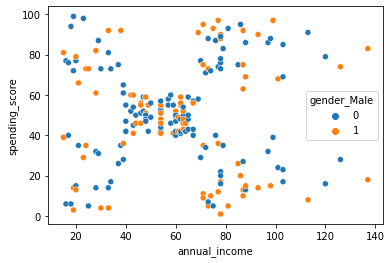

In [20]:
sns.scatterplot(data = df, x = "annual_income", y = "spending_score", hue = "gender_Male")

## Relation between Age and Spending Score

<AxesSubplot:xlabel='age', ylabel='spending_score'>

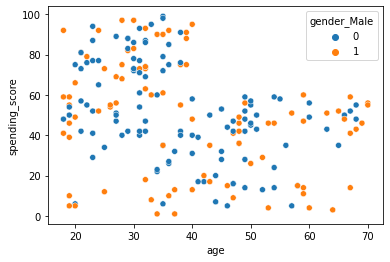

In [21]:
sns.scatterplot(data = df, x = "age", y = "spending_score", hue = "gender_Male")

## Relation between Age and Annual_income

<AxesSubplot:xlabel='age', ylabel='annual_income'>

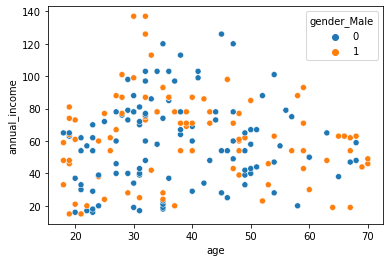

In [22]:
sns.scatterplot(data = df, x = "age", y = "annual_income", hue = "gender_Male")

<AxesSubplot:>

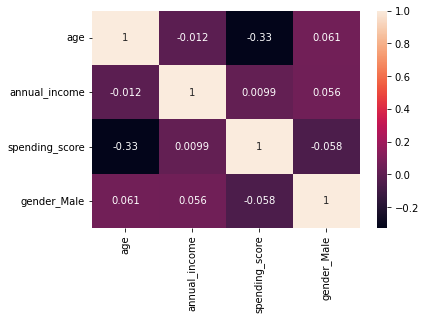

In [23]:
sns.heatmap(df.corr(),annot=True)

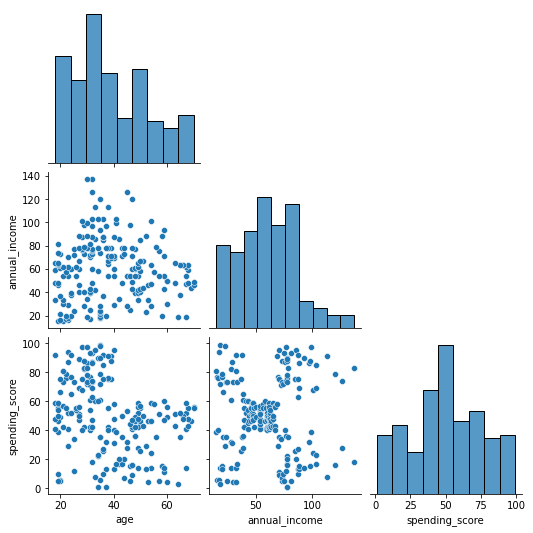

In [24]:
sns.pairplot(df.drop("gender_Male",axis=1),corner=True);

---
---

## 3. Cluster Analysis

The main purpose of this project is to perform [cluster analysis](https://en.wikipedia.org/wiki/Cluster_analysis#:~:text=Cluster%20analysis%20or%20clustering%20is,in%20other%20groups%20(clusters).) with the [K-Means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) algorithm. 

You can perform many [cluster analysis](http://www.stat.columbia.edu/~madigan/W2025/notes/clustering.pdf) using different variables. If you use a maximum of two variables for each cluster analysis, you can identify cluster labels more clearly.

First, the K-Means algorithm expects you to determine the number of clusters (*n_clusters*). You can determine the optimal number of clusters for each cluster analysis in various ways. In this case, you are expected to use the [Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering).

Finally, different information is obtained in each analysis. Therefore, different labeling should be done as a result of each cluster analysis. 

Labeling example: 

- **Normal Customers**  -- An Average consumer in terms of spending and Annual Income
- **Spender Customers** --  Annual Income is less but spending high, so can also be treated as potential target customer.

### Clustering based on Age and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [25]:
df1 = df[['age',"spending_score"]]

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
scaled = StandardScaler()

In [28]:
scaled_df1 = scaled.fit_transform(df1)

In [29]:
from pyclustertend import hopkins

In [30]:
hopkins(scaled_df1,scaled_df1.shape[0])

0.28337310644953134

#### *ii. Determine optimal number of clusters*

In [31]:
from sklearn.cluster import KMeans

In [32]:
ssd = []

K = range(2,10)

for k in K:
    model = KMeans(n_clusters =k, random_state=42)
    model.fit(scaled_df1)
    ssd.append(model.inertia_)

Text(0.5, 1.0, 'elbow method')

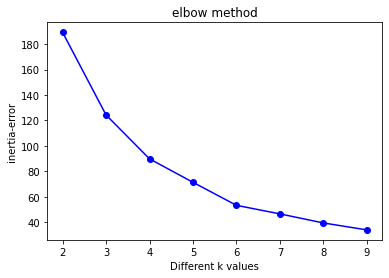

In [33]:
plt.plot(K, ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error") 
plt.title("elbow method")

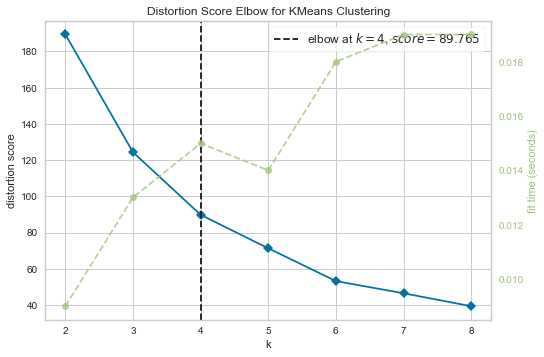

In [34]:
from yellowbrick.cluster import KElbowVisualizer

model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,9))

visualizer.fit(scaled_df1)        # Fit the data to the visualizer
visualizer.show();

In [35]:
from sklearn.metrics import silhouette_score

In [36]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(scaled_df1)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(scaled_df1, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.4721271643062346
For n_clusters=3, the silhouette score is 0.43952990002101927
For n_clusters=4, the silhouette score is 0.4383860846531993
For n_clusters=5, the silhouette score is 0.44754858878462783
For n_clusters=6, the silhouette score is 0.4531637132837109
For n_clusters=7, the silhouette score is 0.40053964470007974
For n_clusters=8, the silhouette score is 0.41387412992354433


In [37]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_df1)
cluster_labels = kmeans.labels_

In [38]:
cluster_labels

array([0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2, 1, 2, 0, 2,
       0, 2, 1, 2, 0, 2, 0, 2, 1, 2, 1, 2, 0, 2, 0, 2, 0, 2, 1, 2, 1, 2,
       1, 2, 1, 0, 0, 0, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2,
       1, 1, 2, 0, 1, 1, 1, 1, 1, 2, 1, 0, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2,
       2, 1, 1, 0, 1, 0, 0, 2, 1, 2, 1, 2, 0, 1, 1, 2, 1, 0, 1, 1, 1, 1,
       1, 2, 0, 2, 2, 2, 1, 1, 1, 1, 2, 0, 2, 2, 0, 2, 0, 2, 1, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2,
       1, 2, 1, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [39]:
df1["cluster"] = cluster_labels

C:\Users\Ebubekir\AppData\Local\Temp/ipykernel_14596/1424224563.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["cluster"] = cluster_labels


Text(0.5, 1.0, 'No Group')

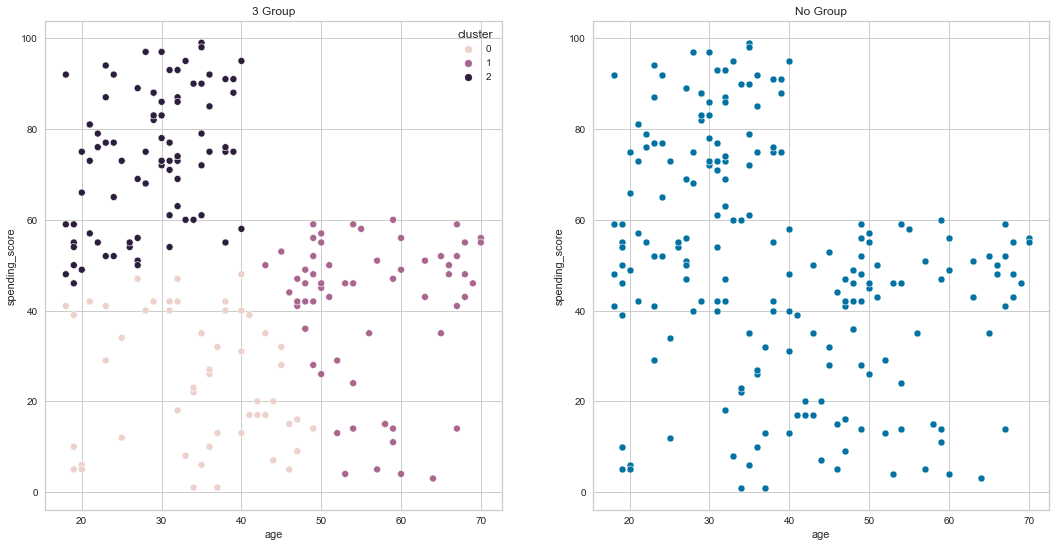

In [40]:
plt.figure(figsize=(18,9))
plt.subplot(1, 2, 1)
sns.scatterplot(data = df1, x = "age",y = "spending_score", hue = 'cluster')
plt.title("3 Group")
plt.subplot(1, 2, 2)
sns.scatterplot(data = df, x = "age",y = "spending_score")
plt.title("No Group")

### Why silhouette_score is negative?

![image.png](attachment:image.png)

#### *iii. Apply K Means*

In [41]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(scaled_df1)
cluster_labels = kmeans.labels_

In [42]:
df1['cluster_k4'] = cluster_labels

Text(0.5, 1.0, 'No Group')

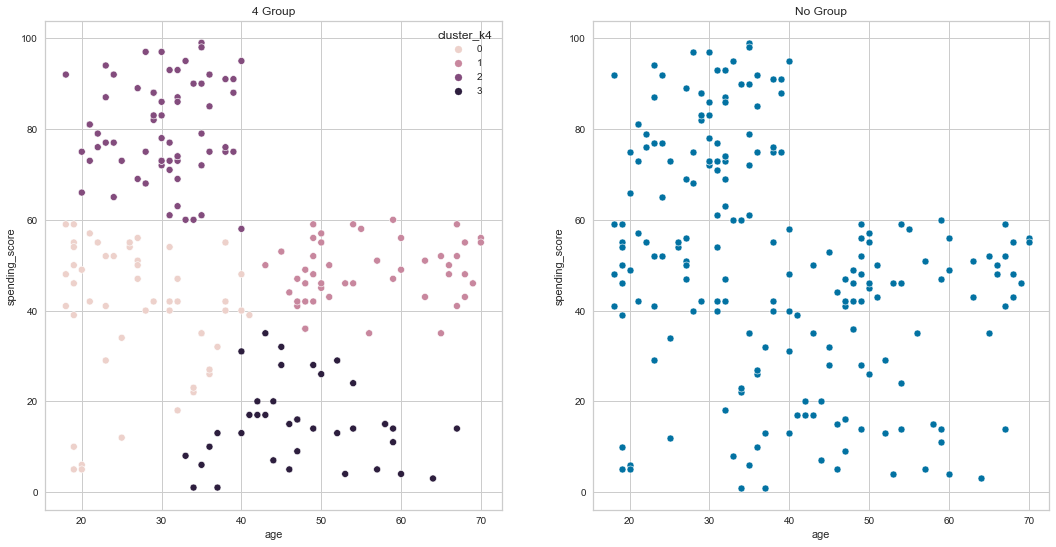

In [43]:
plt.figure(figsize=(18,9))
plt.subplot(1, 2, 1)
sns.scatterplot(data = df1, x = "age",y = "spending_score", hue = 'cluster_k4')
plt.title("4 Group")
plt.subplot(1, 2, 2)
sns.scatterplot(data = df, x = "age",y = "spending_score")
plt.title("No Group")

#### *iv. Visualizing and Labeling All the Clusters*

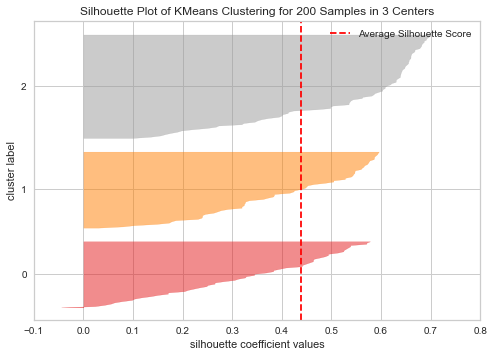

In [44]:

from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model3 = KMeans(n_clusters=3, random_state=42)
visualizer = SilhouetteVisualizer(model3)

visualizer.fit(scaled_df1)    # Fit the data to the visualizer
visualizer.poof();

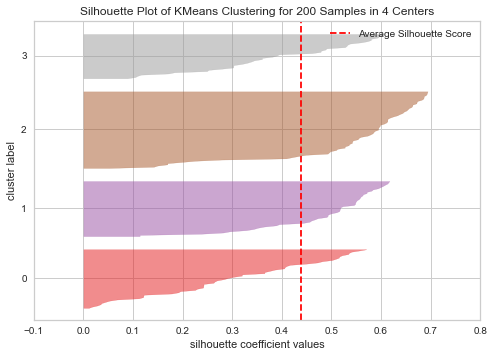

In [45]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model3 = KMeans(n_clusters=4, random_state=42)
visualizer = SilhouetteVisualizer(model3)

visualizer.fit(scaled_df1)    # Fit the data to the visualizer
visualizer.poof();

### Clustering based on Annual Income and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [46]:
df2 = df[['annual_income','spending_score']]

#### *ii. Determine optimal number of clusters*

In [47]:
scaled_df2 = scaled.fit_transform(df2)

In [48]:
hopkins(scaled_df2,scaled_df2.shape[0])

0.3190309029686354

#### *iii. Apply K Means*

In [49]:
ssd = []

K = range(2,10)

for k in K:
    model = KMeans(n_clusters =k, random_state=42)
    model.fit(scaled_df2)
    ssd.append(model.inertia_)

Text(0.5, 1.0, 'elbow method')

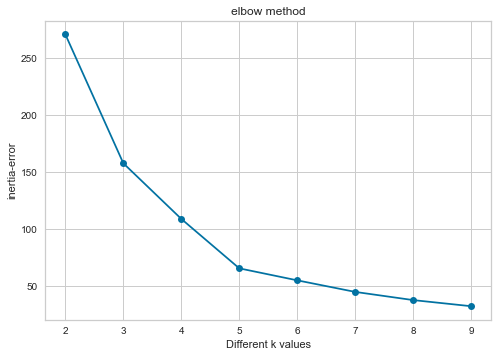

In [50]:
plt.plot(K, ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error") 
plt.title("elbow method")

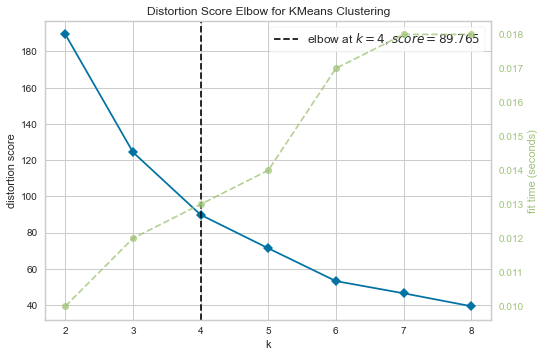

In [51]:
from yellowbrick.cluster import KElbowVisualizer

model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,9))

visualizer.fit(scaled_df1)        # Fit the data to the visualizer
visualizer.show();

In [52]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(scaled_df2)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(scaled_df2, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.3146990432802128
For n_clusters=3, the silhouette score is 0.46658474419000145
For n_clusters=4, the silhouette score is 0.4939069237513199
For n_clusters=5, the silhouette score is 0.5546571631111091
For n_clusters=6, the silhouette score is 0.5398800926790663
For n_clusters=7, the silhouette score is 0.5263454490712252
For n_clusters=8, the silhouette score is 0.4558438123118706


In [53]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(scaled_df2)
cluster_labels = kmeans.labels_

In [54]:
df2['cluster_k5'] = cluster_labels

C:\Users\Ebubekir\AppData\Local\Temp/ipykernel_14596/3707655629.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['cluster_k5'] = cluster_labels


Text(0.5, 1.0, 'No Group')

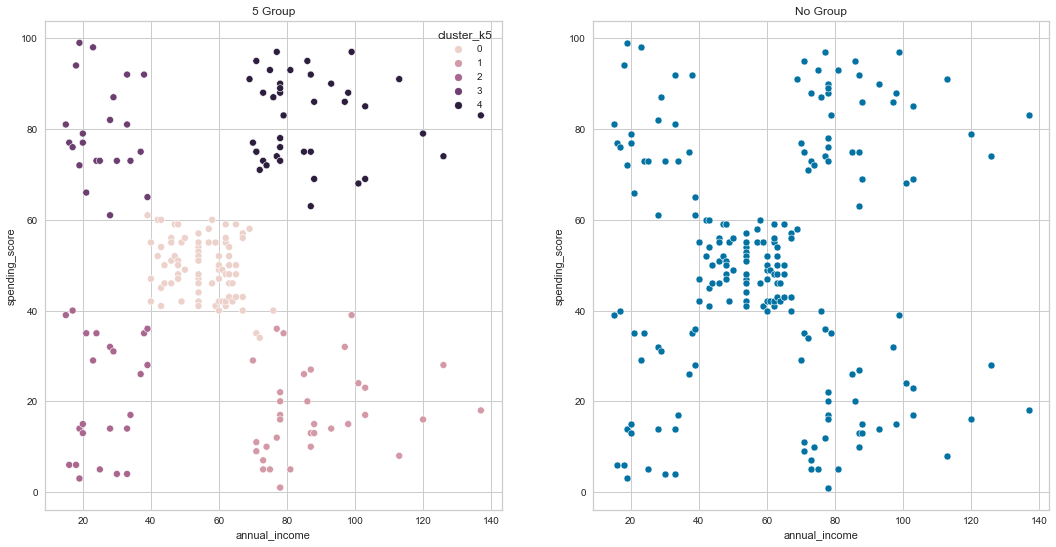

In [55]:
plt.figure(figsize=(18,9))
plt.subplot(1, 2, 1)
sns.scatterplot(data = df2, x = "annual_income",y = "spending_score", hue = 'cluster_k5')
plt.title("5 Group")
plt.subplot(1, 2, 2)
sns.scatterplot(data = df, x = "annual_income",y = "spending_score")
plt.title("No Group")

#### *iv. Visualizing and Labeling All the Clusters*

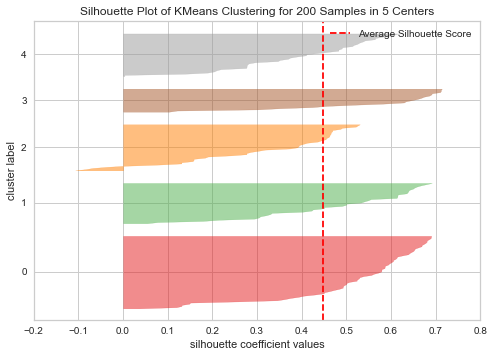

In [56]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model3 = KMeans(n_clusters=5, random_state=42)
visualizer = SilhouetteVisualizer(model3)

visualizer.fit(scaled_df1)    # Fit the data to the visualizer
visualizer.poof();

In [57]:
from sklearn.preprocessing import MinMaxScaler

In [58]:
scaled = MinMaxScaler()

In [59]:
scaled_df = scaled.fit_transform(df)

In [60]:
hopkins(scaled_df,scaled_df.shape[0])

0.20799615719791356

In [61]:
ssd = []

K = range(2,10)

for k in K:
    model = KMeans(n_clusters =k, random_state=42)
    model.fit(scaled_df)
    ssd.append(model.inertia_)

Text(0.5, 1.0, 'elbow method')

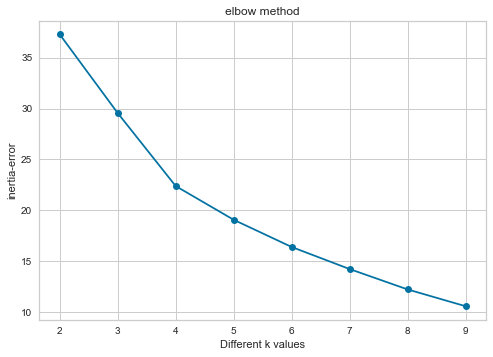

In [62]:
plt.plot(K, ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error") 
plt.title("elbow method")

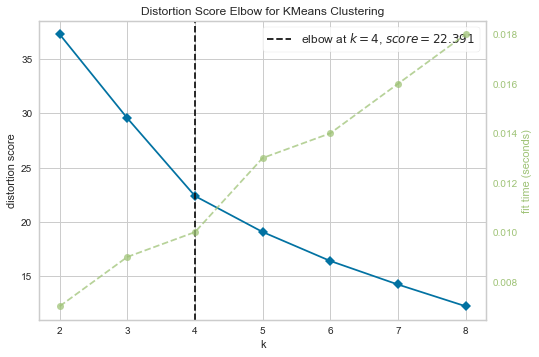

In [63]:
from yellowbrick.cluster import KElbowVisualizer

model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,9))

visualizer.fit(scaled_df)        # Fit the data to the visualizer
visualizer.show();

In [64]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(scaled_df)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(scaled_df, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.5194624832665107
For n_clusters=3, the silhouette score is 0.4583525581125425
For n_clusters=4, the silhouette score is 0.3641657522339062
For n_clusters=5, the silhouette score is 0.37063226192201243
For n_clusters=6, the silhouette score is 0.37896616979430175
For n_clusters=7, the silhouette score is 0.38436967259321775
For n_clusters=8, the silhouette score is 0.39327919485722335


In [65]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(scaled_df)
cluster_labels = kmeans.labels_

In [66]:
df["cluster_k4"] = cluster_labels

Text(0.5, 1.0, 'No Group')

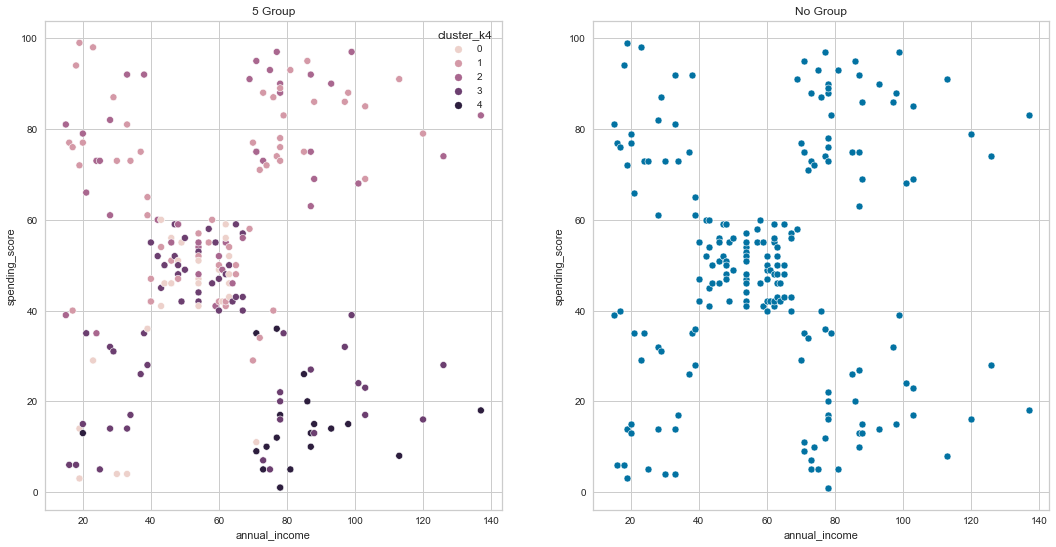

In [67]:
plt.figure(figsize=(18,9))
plt.subplot(1, 2, 1)
sns.scatterplot(data = df, x = "annual_income",y = "spending_score", hue = 'cluster_k4')
plt.title("5 Group")
plt.subplot(1, 2, 2)
sns.scatterplot(data = df, x = "annual_income",y = "spending_score")
plt.title("No Group")

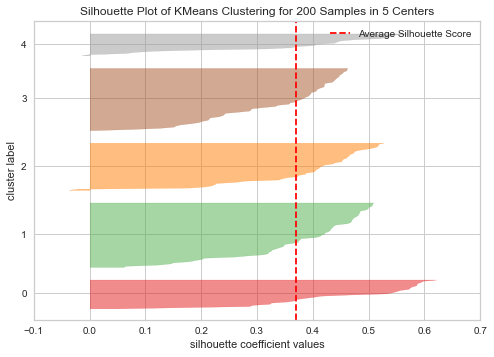

In [68]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model3 = KMeans(n_clusters=5, random_state=42)
visualizer = SilhouetteVisualizer(model3)

visualizer.fit(scaled_df)    # Fit the data to the visualizer
visualizer.poof();

### Hierarchical Clustering

### *i. Determine optimal number of clusters using Dendogram*

### Clustering based on Age and Spending Score- x1

In [69]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [70]:
hc_ward = linkage(y = df, method = "ward")

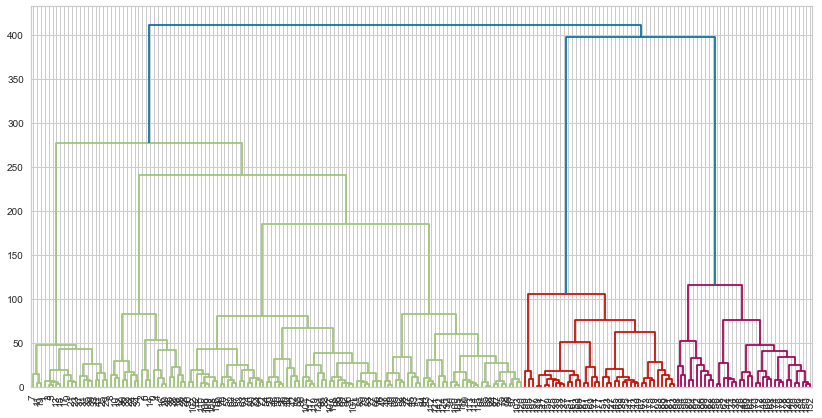

In [71]:
plt.figure(figsize = (14,7))
dendrogram(hc_ward, leaf_font_size = 10);

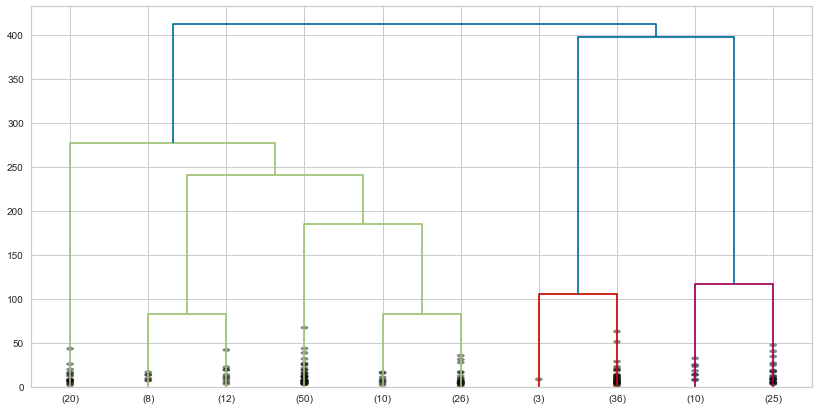

In [72]:
plt.figure(figsize = (14,7))
dendrogram(hc_ward,
           truncate_mode = "lastp",
           p = 10,
           show_contracted = True,
           leaf_font_size = 10);

## Clustering based on Annual Income and Spending Score- x2

### ii. *Apply Agglomerative Clustering*

In [73]:
from sklearn.cluster import AgglomerativeClustering

In [74]:
K = range(2,10)

for k in K:
    model = AgglomerativeClustering(n_clusters = k)
    model.fit_predict(df)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(df, model.labels_)}')

Silhouette Score for 2 clusters: 0.29884342244957585
Silhouette Score for 3 clusters: 0.38097200066292786
Silhouette Score for 4 clusters: 0.40976059756604505
Silhouette Score for 5 clusters: 0.43998759921758507
Silhouette Score for 6 clusters: 0.44286189212091953
Silhouette Score for 7 clusters: 0.42640843662952227
Silhouette Score for 8 clusters: 0.422740865819473
Silhouette Score for 9 clusters: 0.4122029871423715


In [75]:
model = AgglomerativeClustering(n_clusters=6, affinity = "euclidean", linkage = "ward")
clusters = model.fit_predict(df)

In [76]:
df["predicted_clusters"] = clusters

In [77]:
df.groupby("predicted_clusters").mean()

,age,annual_income,spending_score,gender_Male,cluster_k4
predicted_clusters,,,,,
0,41.685714,88.228571,17.285714,0.571429,3.457143
1,43.900000,24.450000,19.100000,0.400000,2.100000
2,32.692308,86.538462,82.128205,0.461538,1.461538
3,24.850000,24.950000,81.000000,0.400000,1.400000
4,25.916667,55.138889,49.222222,0.333333,1.500000
5,54.560000,53.520000,49.160000,0.440000,1.680000


In [78]:
df.predicted_clusters.value_counts()

5    50
2    39
4    36
0    35
1    20
3    20
Name: predicted_clusters, dtype: int64

### iii. *Visualizing and Labeling All the Clusters* 

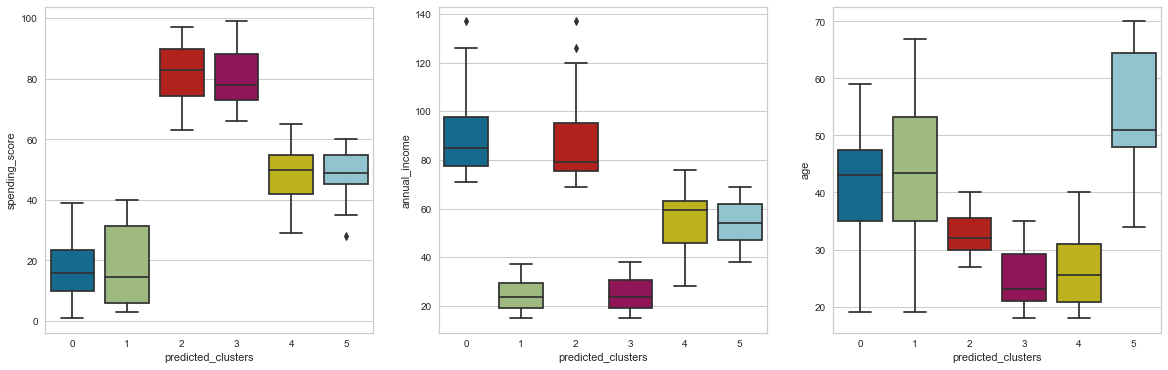

In [79]:
plt.figure(figsize = (20,6))

plt.subplot(131)
sns.boxplot(y = "spending_score", x = "predicted_clusters", data = df)

plt.subplot(132)
sns.boxplot(y = "annual_income", x = "predicted_clusters", data = df)

plt.subplot(133)
sns.boxplot(y = "age", x = "predicted_clusters", data = df);

### Conclusion

**cluster 0** : The average age is around 55, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct to more spending.

**cluster 1**: The average age is around 45, the annula_income is high but the spending_scores are very low. 
This group is our target audience and specific strategies should be developed to drive this group to spend.

**cluster 2** :The average age is around 30. The annula_income is high and spending_scores are very high. 
This group consists of our loyal customers. Our company derives the main profit from this group. Very 
special promotions can be made in order not to miss it.    
    
**cluster 3**: The average age is around 25.both annula_income and spending_scores are on average. 
It should be researched what can be done to direct to more spending.

#### Interpretation based on Annual Income and Spending Score- x2

## Conclusion

### Female

**cluster 0** : The average age is around 40, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 45, the annula_income is very high but the spending_scores is low.
This group is our target audience and special strategies need to be developed for this group.    

**cluster 2** :The average age is around 45. Both annula_income and spending_scores are low. It can be 
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This 
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 30, the annual income and the spending_score
is very high. This group consists of our loyal customers. Our company derives the main profit from this group. 
Very special promotions can be made in order not to miss it.

### Male

**cluster 0** : The average age is around 45, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 40, the annula_income is very high but the spending_scores is very low.
This group is our target audience and special strategies need to be developed for this group.    

**cluster 2** :The average age is around 50. Both annula_income and spending_scores are low. It can be 
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This 
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 30, the annual income and the spending_score
is very high. This group consists of our loyal customers. Our company derives the main profit from this group. 
Very special promotions can be made in order not to miss it.

**cluster 0** : The average age is around 40, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 30, both annula_income and spending_scores are very high. 
This group consists of our loyal customers. Our company derives the main profit from this group. Very 
special promotions can be made in order not to miss it.

**cluster 2** :The average age is around 45. Both annula_income and spending_scores are low. It can be 
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This 
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 40, their annual income is very high but their spending_score
is very low. This group is our target audience and special strategies need to be developed for this 
group.

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___